In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from matplotlib import style
import seaborn as sns
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("student_mat.csv", sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data analysis

In [5]:
df_analysis = data[["sex", "age", "traveltime","absences","freetime","studytime", "schoolsup", "health","failures","activities", "internet", "paid", "Fjob", "Mjob", "G1", "G2", "G3"]]

df_analysis.head()


,sex,age,traveltime,absences,freetime,studytime,schoolsup,health,failures,activities,internet,paid,Fjob,Mjob,G1,G2,G3
0,F,18,2,6,3,2,yes,3,0,no,no,no,teacher,at_home,5,6,6
1,F,17,1,4,3,2,no,3,0,no,yes,no,other,at_home,5,5,6
2,F,15,1,10,3,2,yes,3,3,no,yes,yes,other,at_home,7,8,10
3,F,15,1,2,2,3,no,5,0,yes,yes,yes,services,health,15,14,15
4,F,16,1,4,3,2,no,5,0,no,no,yes,other,other,6,10,10


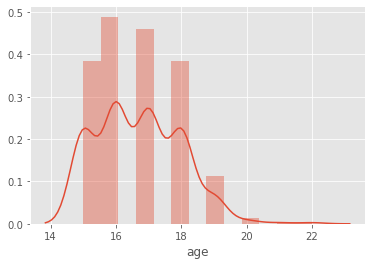

In [6]:
sns.distplot(df_analysis["age"], kde=True)

#### Maximum age students in the class is between 15 to 16

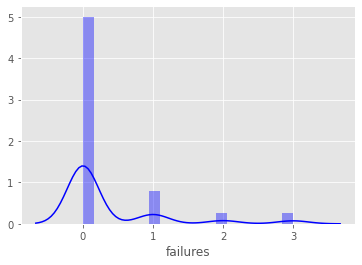

In [7]:
sns.distplot(df_analysis["failures"], kde=True, color="b")

#### Number of failures in the class is less 

## Graph showing absences related to age

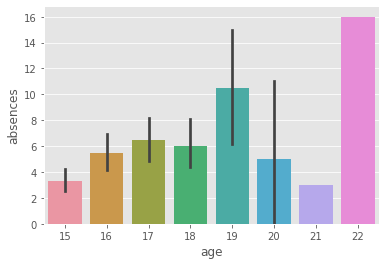

In [8]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
sns.barplot(x="age", y="absences", data=df_analysis)

#### The above graph shows that absences is maximum in the age 22 

##  Graphs showing absences affecting marks 

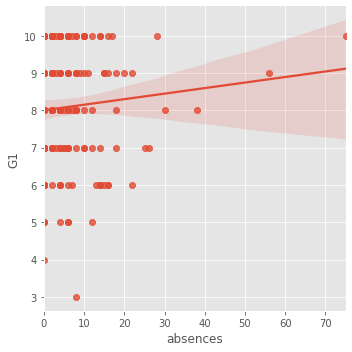

In [9]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G1']< df_analysis['G1'].quantile(0.5)]
# plotting grpah
graph = sns.lmplot(x="absences", y="G1", data=df_analysis)

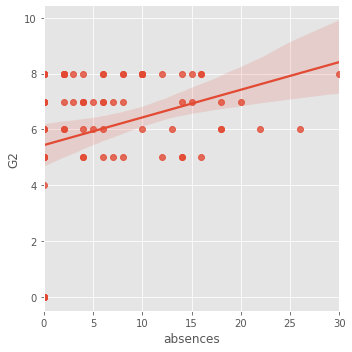

In [10]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G2']< df_analysis['G2'].quantile(0.5)]
# ploting graph
graph = sns.lmplot(x="absences", y="G2", data=df_analysis)

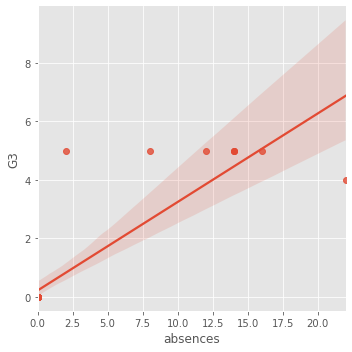

In [11]:

# remove outliers
df_analysis = df_analysis.loc[df_analysis['G3']< df_analysis['G3'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G3", data=df_analysis)

#### We can clearly say that absence in class is somewhat related to lower marks obtained by students

## Final Marks prediction

In [12]:
df = data[["G1", "G2", "G3", "absences","studytime", "freetime", "health"]]

In [13]:
df.head()

,G1,G2,G3,absences,studytime,freetime,health
0,5,6,6,6,2,3,3
1,5,5,6,4,2,3,3
2,7,8,10,10,2,3,3
3,15,14,15,2,3,2,5
4,6,10,10,4,2,3,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   absences   395 non-null    int64
 4   studytime  395 non-null    int64
 5   freetime   395 non-null    int64
 6   health     395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


### predict G3 marks 

In [15]:
predict = "G3"

In [16]:
# y = mx + c

# x will have g1 and g2 value only 
X = np.array(df.drop([predict], 1)) 
print(X)

[[ 5  6  6  2  3  3]
 [ 5  5  4  2  3  3]
 [ 7  8 10  2  3  3]
 ...
 [10  8  3  1  5  3]
 [11 12  0  1  4  5]
 [ 8  9  5  1  2  5]]


In [17]:
# y will have g3 value which we will predict
y = np.array(df[[predict]])
print(y)

[[ 6]
 [ 6]
 [10]
 [15]
 [10]
 [15]
 [11]
 [ 6]
 [19]
 [15]
 [ 9]
 [12]
 [14]
 [11]
 [16]
 [14]
 [14]
 [10]
 [ 5]
 [10]
 [15]
 [15]
 [16]
 [12]
 [ 8]
 [ 8]
 [11]
 [15]
 [11]
 [11]
 [12]
 [17]
 [16]
 [12]
 [15]
 [ 6]
 [18]
 [15]
 [11]
 [13]
 [11]
 [12]
 [18]
 [11]
 [ 9]
 [ 6]
 [11]
 [20]
 [14]
 [ 7]
 [13]
 [13]
 [10]
 [11]
 [13]
 [10]
 [15]
 [15]
 [ 9]
 [16]
 [11]
 [11]
 [ 9]
 [ 9]
 [10]
 [15]
 [12]
 [ 6]
 [ 8]
 [16]
 [15]
 [10]
 [ 5]
 [14]
 [11]
 [10]
 [10]
 [11]
 [10]
 [ 5]
 [12]
 [11]
 [ 6]
 [15]
 [10]
 [ 8]
 [ 6]
 [14]
 [10]
 [ 7]
 [ 8]
 [18]
 [ 6]
 [10]
 [14]
 [10]
 [15]
 [10]
 [14]
 [ 8]
 [ 5]
 [17]
 [14]
 [ 6]
 [18]
 [11]
 [ 8]
 [18]
 [13]
 [16]
 [19]
 [10]
 [13]
 [19]
 [ 9]
 [16]
 [14]
 [13]
 [ 8]
 [13]
 [15]
 [15]
 [13]
 [13]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 0]
 [18]
 [ 0]
 [ 0]
 [12]
 [11]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [12]
 [15]
 [ 0]
 [ 9]
 [11]
 [13]
 [ 0]
 [11]
 [ 0]
 [11]
 [ 0]
 [10]
 [ 0]
 [14]
 [10]
 [ 0]
 [12]
 [ 8]
 [13]
 [10]
 [15]
 [12]
 [ 0]
 [ 7]
 [ 0]
 [10]
 [ 7]
 [12]
 [10

In [18]:
# spliting the data into test and train in the ratio of 90:10
# spliting into four arrays



#### spliting data syntax here should be moved after tranning module

In [19]:

# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)


#### Only best tranied model will get saved 

In [20]:
best = 0
for i in range(100):
    
    # spliting data syntax should be moved out of the loop after tranning and storing trained module.
    # after test_size in for loop should be added not to select random data while splitting. syntax : random_state=0
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # accuracy 
    print("accuracy:", acc)
    
    
    # saving the model: 

    #studentmodel is the name of the model
    #wb mode
    
    if acc>best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f) 

print("best accuracy:",best)

LinearRegression()

accuracy: 0.7997245199293487


LinearRegression()

accuracy: 0.7161443795949878


LinearRegression()

accuracy: 0.8359047555122553


LinearRegression()

accuracy: 0.8823188794670557


LinearRegression()

accuracy: 0.7787529377230784


LinearRegression()

accuracy: 0.7413436290536166


LinearRegression()

accuracy: 0.8998430051747466


LinearRegression()

accuracy: 0.8221729428310981


LinearRegression()

accuracy: 0.8212086125577975


LinearRegression()

accuracy: 0.8786590963874576


LinearRegression()

accuracy: 0.8426886336131183


LinearRegression()

accuracy: 0.8716102880020089


LinearRegression()

accuracy: 0.8024825927655161


LinearRegression()

accuracy: 0.7309742284715735


LinearRegression()

accuracy: 0.8755569238449853


LinearRegression()

accuracy: 0.8025705648429484


LinearRegression()

accuracy: 0.8048742573677448


LinearRegression()

accuracy: 0.9132887592481064


LinearRegression()

accuracy: 0.7615729227363499


LinearRegression()

accuracy: 0.8147745667266444


LinearRegression()

accuracy: 0.8404261456839065


LinearRegression()

accuracy: 0.8093021033916492


LinearRegression()

accuracy: 0.8530480200500208


LinearRegression()

accuracy: 0.8317450163021508


LinearRegression()

accuracy: 0.8302216896536364


LinearRegression()

accuracy: 0.7803712987056978


LinearRegression()

accuracy: 0.7441855962880353


LinearRegression()

accuracy: 0.8274601632671033


LinearRegression()

accuracy: 0.8699187637323389


LinearRegression()

accuracy: 0.7760904406066289


LinearRegression()

accuracy: 0.7945226096650903


LinearRegression()

accuracy: 0.765295789738786


LinearRegression()

accuracy: 0.7616184358511932


LinearRegression()

accuracy: 0.7426597151273482


LinearRegression()

accuracy: 0.7004868626127109


LinearRegression()

accuracy: 0.8543998872685951


LinearRegression()

accuracy: 0.7406133640530698


LinearRegression()

accuracy: 0.8078660121977355


LinearRegression()

accuracy: 0.7570532363151247


LinearRegression()

accuracy: 0.7896483601814089


LinearRegression()

accuracy: 0.8700994360050595


LinearRegression()

accuracy: 0.8301950327192134


LinearRegression()

accuracy: 0.8421255315935708


LinearRegression()

accuracy: 0.9334181576069177


LinearRegression()

accuracy: 0.7993229993244386


LinearRegression()

accuracy: 0.7171049780420978


LinearRegression()

accuracy: 0.7745590615517471


LinearRegression()

accuracy: 0.8932680064712615


LinearRegression()

accuracy: 0.864168433653178


LinearRegression()

accuracy: 0.8631446830073776


LinearRegression()

accuracy: 0.8956930263812556


LinearRegression()

accuracy: 0.7933529397593261


LinearRegression()

accuracy: 0.8752078281205891


LinearRegression()

accuracy: 0.8613596468323789


LinearRegression()

accuracy: 0.9022957882204049


LinearRegression()

accuracy: 0.8840661977309616


LinearRegression()

accuracy: 0.9053315269440156


LinearRegression()

accuracy: 0.8491297435209847


LinearRegression()

accuracy: 0.8135187830526932


LinearRegression()

accuracy: 0.849050245306638


LinearRegression()

accuracy: 0.7141211821556372


LinearRegression()

accuracy: 0.8043471583348231


LinearRegression()

accuracy: 0.7957654857982441


LinearRegression()

accuracy: 0.8388427037946204


LinearRegression()

accuracy: 0.9031042282125827


LinearRegression()

accuracy: 0.764321879176922


LinearRegression()

accuracy: 0.813818367648291


LinearRegression()

accuracy: 0.737766219019599


LinearRegression()

accuracy: 0.7014076457028586


LinearRegression()

accuracy: 0.6480901216548987


LinearRegression()

accuracy: 0.7903060764711928


LinearRegression()

accuracy: 0.8965375453035239


LinearRegression()

accuracy: 0.6810311023728561


LinearRegression()

accuracy: 0.8062584316488246


LinearRegression()

accuracy: 0.8215845260904914


LinearRegression()

accuracy: 0.8846823999154818


LinearRegression()

accuracy: 0.8365629752628458


LinearRegression()

accuracy: 0.7876581943773103


LinearRegression()

accuracy: 0.7622222927878674


LinearRegression()

accuracy: 0.8591602175309974


LinearRegression()

accuracy: 0.8527006722592425


LinearRegression()

accuracy: 0.8420436377142219


LinearRegression()

accuracy: 0.8104125280273086


LinearRegression()

accuracy: 0.8242468416511336


LinearRegression()

accuracy: 0.8992369607343795


LinearRegression()

accuracy: 0.9087005065020122


LinearRegression()

accuracy: 0.8637505231571605


LinearRegression()

accuracy: 0.8516287776765421


LinearRegression()

accuracy: 0.7946049362825617


LinearRegression()

accuracy: 0.9250248493200436


LinearRegression()

accuracy: 0.8583130212584564


LinearRegression()

accuracy: 0.9047854593155269


LinearRegression()

accuracy: 0.7434934408473186


LinearRegression()

accuracy: 0.9059445587174991


LinearRegression()

accuracy: 0.8742664025803548


LinearRegression()

accuracy: 0.8928201989089892


LinearRegression()

accuracy: 0.8003861667461601


LinearRegression()

accuracy: 0.7605147175785139


LinearRegression()

accuracy: 0.8785489360972516


LinearRegression()

accuracy: 0.6793973027110253
best accuracy: 0.9334181576069177


#### After traning the model for 100 times, accuracy usually remains between 89 to 94 %

#### model is trained and saved. So we commented this section of training the model.

In [21]:
# linear = linear_model.LinearRegression()

In [22]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# accuracy 
#print(acc)

In [23]:
# saving the model: 

# studentmodel is the name of the model
# wb mode
# with open("studentmodel.pickle", "wb") as f:
    #pickle.dump(linear, f) 

In [24]:
# loading the pickle file with model so that we do not need to train our model every time
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) 

In [25]:
print('Coefficient(m): \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient(m): 
 [[ 0.14963536  1.00964675  0.04123599 -0.14917588  0.13066596  0.09278478]]
Intercept: 
 [-2.74614771]


In [26]:
y_pred = linear.predict(x_train)

In [27]:
print(len(y_pred))

355


In [28]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train,y_pred)

1.1541448902370266

In [29]:
for x in range(len(y_pred)):
    # checking for prerdict output
    print(x_train[x],y_train[x], y_pred[x])
    

[13 13 23  2  2  5] [13] [13.69985147]
[10 10 14  2  3  5] [9] [9.98154721]
[10 10  8  3  2  3] [10] [9.26871987]
[10 10  6  4  3  5] [11] [9.35330754]
[ 8  6 18  2  1  5] [7] [5.54730155]
[14 15  0  2  3  5] [15] [15.0510185]
[8 7 0 2 4 5] [8] [6.20669836]
[7 9 0 3 3 3] [8] [7.61094509]
[5 6 6 2 3 3] [6] [4.67932596]
[7 7 2 2 4 3] [7] [5.95396542]
[8 7 0 2 3 3] [0] [5.89046284]
[14 15  4  3  4  4] [16] [15.10466777]
[12 13  6  1  4  5] [14] [13.25971208]
[7 6 5 1 4 5] [7] [5.40277208]
[11 11  6  1  5  5] [10] [11.22144919]
[7 6 0 1 3 5] [0] [5.06592617]
[7 0 0 1 4 5] [0] [-0.86128834]
[14 12  0  2  4  5] [12] [12.15274423]
[17 17  0  4  2  5] [18] [17.09020035]
[9 9 8 1 3 2] [9] [8.4456707]
[10  9  0  4  4  4] [0] [8.13412603]
[6 6 2 2 2 5] [6] [4.71892096]
[12 12  2  1  2  5] [11] [11.82378945]
[7 0 0 3 4 3] [0] [-1.34520965]
[13 13  2  2  4  5] [11] [13.0952276]
[11 10  4  3  3  5] [11] [9.56964679]
[10  0  0  2  4  5] [0] [-0.56155815]
[8 9 0 1 5 5] [10] [8.50583369]
[10 13  6  2  

[17 18 21  2  1  2] [18] [18.85513434]
[13 13  2  2  5  3] [13] [13.040324]
[7 7 5 2 3 4] [7] [6.03979221]
[ 6  5 14  1  4  3] [5] [4.42904433]
[ 8 10 12  1  2  3] [10] [9.43274487]
[ 9 10  9  3  3  5] [9] [9.47655603]
[16 18  2  3  3  5] [18] [18.31252556]
[9 9 0 2 5 3] [10] [8.32072361]
[ 6  5 14  1  5  1] [5] [4.37414073]
[14 12 10  2  2  5] [11] [12.30377221]
[5 8 0 2 3 5] [7] [6.63677307]
[12 14  1  3  4  5] [15] [13.76482712]
[14 12  4  1  4  5] [11] [12.46686407]
[ 8 10  0  2  3  2] [12] [8.82661829]
[8 9 2 2 3 5] [10] [8.17779787]
[15 13 14  3  1  3] [13] [13.16258687]
[17 18  0  1  5  5] [18] [18.93937261]
[8 8 2 2 3 3] [8] [6.98258156]
[12 12  4  1  2  2] [13] [11.62790709]
[ 6  5 16  1  5  5] [5] [4.82775184]
[5 0 0 1 5 4] [0] [-1.12267787]
[13 15  2  2  3  3] [16] [14.79828557]
[16 17  0  2  4  5] [17] [17.50024867]
[9 8 6 1 2 4] [10] [7.40845558]
[12 12  1  4  2  3] [12] [11.14945627]
[13 12  6  3  3  3] [12] [11.78511341]
[15 15  0  2  2  5] [15] [15.0699879]
[13 11  2  2

### The easiest way to compare the target and prediction is to plot them of scatter plot

Text(0.5, 0, 'Targets (y_train)')

Text(0, 0.5, 'Predictions (y_pred)')

(0.0, 22.0)

(0.0, 22.0)

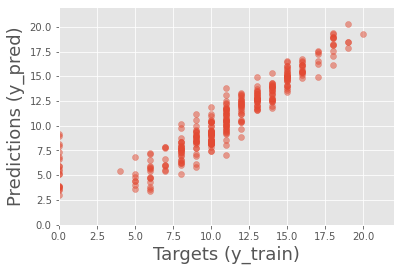

In [30]:
plt.scatter(y_train, y_pred, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()

#### From the above graph we can clearly say that our model predicts almost accurate results. 
#### Howerver there are few wrong predictions. More tranning the model might help. 

## Testing the model:

In [32]:
y_pred_test = linear.predict(x_test)

In [34]:
print(len(y_pred_test))

40


In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_test)

1.6384977695312362

In [37]:
for x in range(len(y_pred_test)):
    # checking for prerdict output
    print(y_test[x], y_pred_test[x])

[0] [-1.44086037]
[13] [14.17157824]
[11] [10.35248798]
[12] [11.50509011]
[15] [14.73524246]
[11] [10.77666339]
[15] [14.93095611]
[10] [10.37795589]
[0] [7.14252972]
[8] [6.9197216]
[12] [11.33894917]
[8] [7.01411773]
[10] [6.92619047]
[16] [14.73478298]
[10] [9.47960384]
[15] [15.19228803]
[10] [9.18273958]
[11] [11.88243452]
[10] [7.16283413]
[9] [8.72282832]
[10] [10.07082368]
[11] [8.69020653]
[0] [-0.84185946]
[14] [14.01224306]
[15] [15.03158963]
[0] [6.71454002]
[9] [7.10659551]
[19] [20.25328587]
[8] [7.57455141]
[8] [8.39186895]
[10] [8.92439888]
[11] [12.12485466]
[0] [4.56412109]
[0] [8.11624226]
[0] [7.94855647]
[12] [10.39692528]
[11] [10.69918722]
[11] [10.98860461]
[8] [5.68443638]
[12] [12.10939255]


In [ ]:
# plotting

Text(0.5, 0, 'Targets (y_test)')

Text(0, 0.5, 'Predictions (y_pred_test)')

(0.0, 22.0)

(0.0, 22.0)

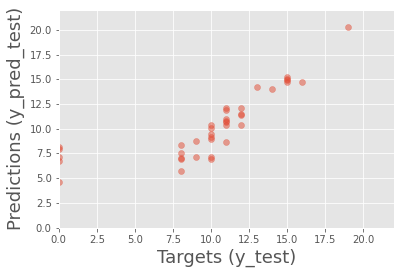

In [39]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred_test)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()